1. IMPORT LIBRARY

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

2. Load Data

In [8]:
df=pd.read_csv(r"C:\My python Files\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


3. Clean Data

In [9]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [16]:
df.drop_duplicates(inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_Encoded
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


4.Preprocess Data

In [45]:
le=LabelEncoder()
df['State_Encoded']=le.fit_transform(df['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_Encoded
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


5.Split Data

In [46]:
X=df[['R&D Spend','Administration','Marketing Spend','State_Encoded']]
Y=df['Profit']

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

6.Create and Train Model

In [48]:
profit_model=LinearRegression()
profit_model.fit(X_train,Y_train)

LinearRegression()

7.Test the Model

In [49]:
rd=float(input("Enter the amount spent on resarch and Development: "))
adm=float(input("Enter the administation expense: "))
ms=float(input("Enter the Marketing expense: "))
st=input("Enter your state: ")

Enter the amount spent on resarch and Development:  12132
Enter the administation expense:  121232
Enter the Marketing expense:  12143
Enter your state:  New York


In [51]:
state_encoded=le.transform([st])[0]
print(state_encoded)

2


In [53]:
result=profit_model.predict([[rd,adm,ms,state_encoded]])
print("The predicted Profit is: ",result[0])

The predicted Profit is:  55945.41745255775


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8.Evalution

In [54]:
model_prediction=profit_model.predict(X_test)

In [55]:
len(Y_test)

10

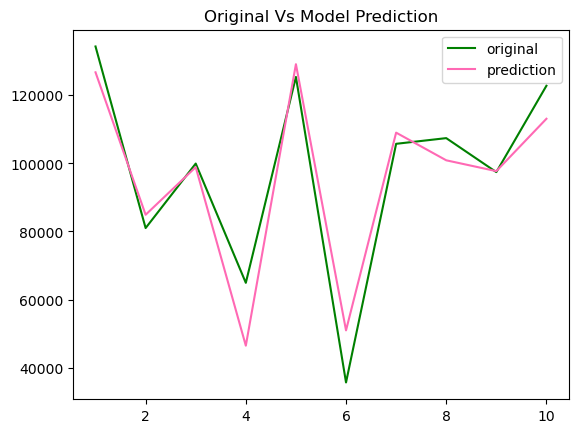

In [56]:
plt.plot(np.arange(1,11),Y_test,color='green',label="original")
plt.plot(np.arange(1,11),model_prediction,color='hotpink',label="prediction")
plt.title("Original Vs Model Prediction")
plt.legend()
plt.show()

In [57]:
r2score=r2_score(Y_test,model_prediction)
print(r2score)
if r2score>0.5:
    print("Model is good fit")
else:
    print("Model is not good fit")

0.9000614254946402
Model is good fit


In [58]:
mae=mean_absolute_error(Y_test,model_prediction)
print(mae)

6979.17574672139


In [59]:
mse=mean_squared_error(Y_test,model_prediction)
print(mse)

80929465.49097784
